# Electron Transport Tests

Run the electron transport script and then start determining methods of comparison for electrons in different magnetic field simulations.

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
from IPython import display
import matplotlib.pyplot as plt

       X      Y        Z
0 -700.0 -700.0   5500.0
1 -700.0 -700.0   6800.0
2 -700.0 -700.0   8100.0
3 -700.0 -700.0   9400.0
4 -700.0 -700.0  10700.0
(-0.28790135295715463, -0.28995084503577251, 1.3220382139887157)


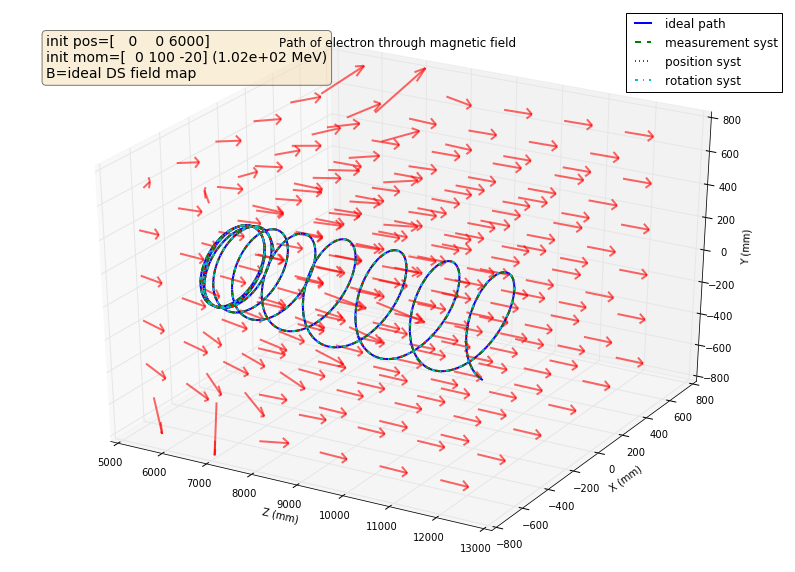

In [5]:
%run electronsim.py
#display.clear_output(wait=True)
#display.display(plt.gcf())

-550.277186124 -50.4171382202
-550.9586867 -47.1023352068


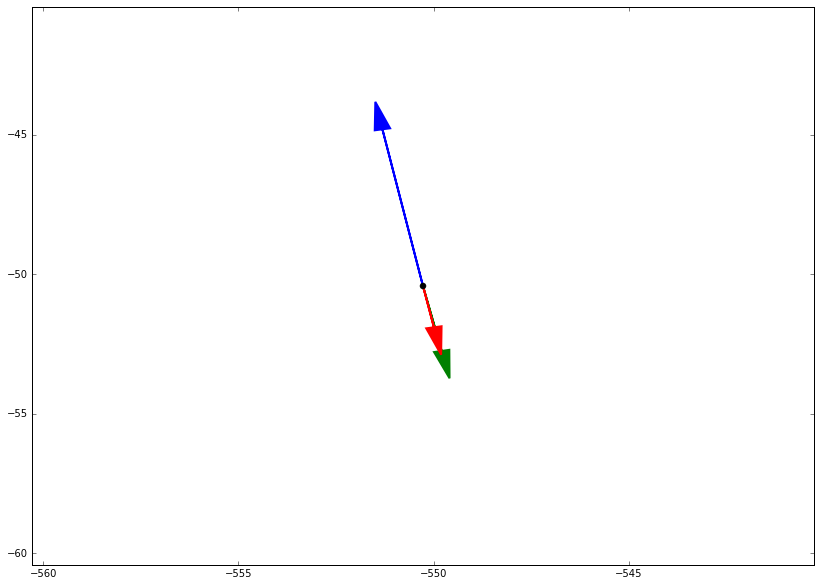

In [27]:
df_ideal = df_dict['df_ideal']
df_bm=df_dict['df_bm']
df_br=df_dict['df_br']
df_bp = df_dict['df_bp']
x = df_ideal.query('Z==8410').X.values[0]
y = df_ideal.query('Z==8410').Y.values[0]
xbm = df_bm.query('Z==8410').X.values[0]
ybm = df_bm.query('Z==8410').Y.values[0]
xbr = df_br.query('Z==8410').X.values[0]
ybr = df_br.query('Z==8410').Y.values[0]
xbp = df_bp.query('Z==8410').X.values[0]
ybp = df_bp.query('Z==8410').Y.values[0]
print x, y
print xbm, ybm
plt.plot(x,y,'ok')
ax =plt.gca()
ax.set_ylim(y-10,y+10)
ax.set_xlim(x-10,x+10)
ax.arrow(x,y,x-xbm,y-ybm,head_width=0.4, head_length=1, linewidth=2, length_includes_head=True, fc='g', ec='g')
ax.arrow(x,y,x-xbr,y-ybr,head_width=0.4, head_length=1, linewidth=2, length_includes_head=True, fc='b', ec='b')
ax.arrow(x,y,x-xbp,y-ybp,head_width=0.4, head_length=1, linewidth=2, length_includes_head=True, fc='r', ec='r')
plt.show()


In [131]:
df_comps

dx        dy
meas_syst  5.081969  0.739796
rot_syst  -9.319438 -1.497500
pos_syst   1.457486  0.023382

## Simulated Tracker

The tracker consists of 20 ring stations, each station at a particular Z value.  We will make some assumptions concerning the location of the stations, as the exact Z values are not currently available (?) from the TDR.

    Active tracker length: 3051 mm
    # of Stations: 20
    Est. tracker start: Z = 8410


In [1]:
zs_trk = np.linspace(8410,8410+3051, 20)
print 'Estimated Tracker Station Locations:'
print zs_trk

Estimated Tracker Station Locations:
[  8410.           8570.57894737   8731.15789474   8891.73684211
   9052.31578947   9212.89473684   9373.47368421   9534.05263158
   9694.63157895   9855.21052632  10015.78947368  10176.36842105
  10336.94736842  10497.52631579  10658.10526316  10818.68421053
  10979.26315789  11139.84210526  11300.42105263  11461.        ]


In [7]:
df_tmp = pd.DataFrame({'X':[np.nan]*len(zs_trk), 'Y':[np.nan]*len(zs_trk), 'Z':zs_trk})

In [8]:
df_tmp

X   Y             Z
0  NaN NaN   8410.000000
1  NaN NaN   8570.578947
2  NaN NaN   8731.157895
3  NaN NaN   8891.736842
4  NaN NaN   9052.315789
5  NaN NaN   9212.894737
6  NaN NaN   9373.473684
7  NaN NaN   9534.052632
8  NaN NaN   9694.631579
9  NaN NaN   9855.210526
10 NaN NaN  10015.789474
11 NaN NaN  10176.368421
12 NaN NaN  10336.947368
13 NaN NaN  10497.526316
14 NaN NaN  10658.105263
15 NaN NaN  10818.684211
16 NaN NaN  10979.263158
17 NaN NaN  11139.842105
18 NaN NaN  11300.421053
19 NaN NaN  11461.000000

In [10]:
df_ideal = df_ideal.append(df_tmp)

In [11]:
df_ideal

X           Y             Z
0        0.000000    0.000000   6000.000000
1       -0.003005    1.175922   5999.764814
2       -0.012020    2.351812   5999.529627
3       -0.027045    3.527641   5999.294439
4       -0.048080    4.703378   5999.059250
5       -0.075125    5.878991   5998.824059
6       -0.108179    7.054451   5998.588868
7       -0.147243    8.229726   5998.353676
8       -0.192315    9.404786   5998.118482
9       -0.243395   10.579600   5997.883288
10      -0.300482   11.754137   5997.648092
11      -0.363574   12.928366   5997.412896
12      -0.432671   14.102257   5997.177699
13      -0.507770   15.275780   5996.942501
14      -0.588871   16.448903   5996.707302
15      -0.675971   17.621595   5996.472102
16      -0.769069   18.793827   5996.236901
17      -0.868163   19.965566   5996.001700
18      -0.973250   21.136783   5995.766498
19      -1.084328   22.307448   5995.531296
20      -1.201395   23.477528   5995.296093
21      -1.324447   24.646994   5995.060890
22      -1.453482   25.815815   5994.825686
23      -1.588498   26.983960   5994.590482
24      -1.729490   28.151398   5994.355277
25      -1.876455   29.318100   5994.120073
26      -2.029391   30.484034   5993.884868
27      -2.188293   31.649170   5993.649664
28      -2.353158   32.813477   5993.414459
29      -2.523981   33.976925   5993.179255
...           ...         ...           ...
14062 -506.159146 -168.913763  11994.116979
14063 -505.546403 -169.690714  11994.794481
14064 -504.930941 -170.465505  11995.471992
14065 -504.312767 -171.238125  11996.149511
14066 -503.691888 -172.008567  11996.827039
14067 -503.068312 -172.776819  11997.504576
14068 -502.442047 -173.542873  11998.182122
14069 -501.813101 -174.306720  11998.859676
14070 -501.181481 -175.068350  11999.537239
14071 -500.547195 -175.827753  12000.214810
0             NaN         NaN   8410.000000
1             NaN         NaN   8570.578947
2             NaN         NaN   8731.157895
3             NaN         NaN   8891.736842
4             NaN         NaN   9052.315789
5             NaN         NaN   9212.894737
6             NaN         NaN   9373.473684
7             NaN         NaN   9534.052632
8             NaN         NaN   9694.631579
9             NaN         NaN   9855.210526
10            NaN         NaN  10015.789474
11            NaN         NaN  10176.368421
12            NaN         NaN  10336.947368
13            NaN         NaN  10497.526316
14            NaN         NaN  10658.105263
15            NaN         NaN  10818.684211
16            NaN         NaN  10979.263158
17            NaN         NaN  11139.842105
18            NaN         NaN  11300.421053
19            NaN         NaN  11461.000000

[14092 rows x 3 columns]

In [13]:
np.any(df_ideal.Z.duplicated())

False

In [14]:
df_ideal.sort_values('Z')

X           Y             Z
1838  -444.397031  -49.997989   5770.898030
1839  -444.116940  -51.164035   5770.898092
1837  -444.670906  -48.830469   5770.898210
1840  -443.830642  -52.328572   5770.898397
1836  -444.938558  -47.661506   5770.898633
1841  -443.538144  -53.491567   5770.898944
1835  -445.199979  -46.491133   5770.899299
1842  -443.239456  -54.652987   5770.899734
1834  -445.455162  -45.319385   5770.900207
1843  -442.934585  -55.812800   5770.900765
1833  -445.704100  -44.146295   5770.901359
1844  -442.623540  -56.970971   5770.902038
1832  -445.946785  -42.971895   5770.902754
1845  -442.306330  -58.127470   5770.903552
1831  -446.183210  -41.796220   5770.904393
1846  -441.982964  -59.282261   5770.905308
1830  -446.413370  -40.619302   5770.906275
1847  -441.653451  -60.435314   5770.907305
1829  -446.637256  -39.441175   5770.908401
1848  -441.317801  -61.586594   5770.909544
1828  -446.854864  -38.261873   5770.910770
1849  -440.976023  -62.736070   5770.912023
1827  -447.066186  -37.081428   5770.913384
1850  -440.628127  -63.883708   5770.914743
1826  -447.271217  -35.899876   5770.916241
1851  -440.274123  -65.029476   5770.917703
1825  -447.469951  -34.717248   5770.919343
1852  -439.914021  -66.173342   5770.920904
1824  -447.662382  -33.533580   5770.922689
1853  -439.547830  -67.315273   5770.924344
...           ...         ...           ...
14042 -517.831379 -152.935936  11980.568786
14043 -517.274582 -153.754057  11981.246111
14044 -516.714921 -154.570214  11981.923445
14045 -516.152401 -155.384397  11982.600788
14046 -515.587030 -156.196594  11983.278140
14047 -515.018814 -157.006797  11983.955501
14048 -514.447762 -157.814995  11984.632871
14049 -513.873879 -158.621178  11985.310250
14050 -513.297173 -159.425337  11985.987638
14051 -512.717652 -160.227462  11986.665034
14052 -512.135322 -161.027542  11987.342440
14053 -511.550190 -161.825568  11988.019854
14054 -510.962264 -162.621530  11988.697277
14055 -510.371551 -163.415419  11989.374709
14056 -509.778059 -164.207224  11990.052150
14057 -509.181794 -164.996937  11990.729599
14058 -508.582764 -165.784546  11991.407058
14059 -507.980977 -166.570043  11992.084525
14060 -507.376440 -167.353418  11992.762001
14061 -506.769160 -168.134661  11993.439485
14062 -506.159146 -168.913763  11994.116979
14063 -505.546403 -169.690714  11994.794481
14064 -504.930941 -170.465505  11995.471992
14065 -504.312767 -171.238125  11996.149511
14066 -503.691888 -172.008567  11996.827039
14067 -503.068312 -172.776819  11997.504576
14068 -502.442047 -173.542873  11998.182122
14069 -501.813101 -174.306720  11998.859676
14070 -501.181481 -175.068350  11999.537239
14071 -500.547195 -175.827753  12000.214810

[14092 rows x 3 columns]

In [22]:
df_ideal.iloc[df_ideal.query('Z==8410').index.values[0]]

X       0.0
Y       0.0
Z    6000.0
Name: 0, dtype: float64